# Density-Based Spatial Clustering Algorithm with Noise (DBSCAN).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Credit.csv')
df.sample(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5713,C15872,2456.499396,1.000000,4791.33,2067.80,2723.53,0.000000,1.0,0.666667,1.0,0.000000,0,78,6500.0,839.407521,817.362420,0.0,12
1344,C11389,61.976914,0.818182,401.63,401.63,0.00,0.000000,0.5,0.500000,0.0,0.000000,0,7,6000.0,806.587482,130.017867,0.2,12
4361,C14483,1096.994956,1.000000,0.00,0.00,0.00,1148.512914,0.0,0.000000,0.0,0.166667,4,0,2500.0,160.482027,404.435634,0.0,12
5079,C15222,2948.447663,1.000000,0.00,0.00,0.00,1539.285222,0.0,0.000000,0.0,0.333333,13,0,3000.0,207.448103,13350.556820,0.0,12


In [3]:
selected_feature = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
df_selected = df[selected_feature]  # kupilih 4 karena == kebanyakan kalo make semua

In [4]:
df_selected.isna().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
PAYMENTS        0
dtype: int64

# Feature Scalling
day26<br>
check data original di github nya aja

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)
# kenapa di normalisasi, karena DBSCAN ini rentang terhadap perebaran data / skala data

In [ ]:
best_score = -1
best_k = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Cluster {i} = Silhouette Score = {score:.3f}")

    if score > best_score:
        best_score = score
        best_k = i

# mendapatkan score bagus di Cluster ke-2

Cluster 2 = Silhouette Score = 0.625
Cluster 3 = Silhouette Score = 0.599
Cluster 4 = Silhouette Score = 0.545
Cluster 5 = Silhouette Score = 0.554
Cluster 6 = Silhouette Score = 0.554
Cluster 7 = Silhouette Score = 0.416
Cluster 8 = Silhouette Score = 0.423
Cluster 9 = Silhouette Score = 0.355
Cluster 10 = Silhouette Score = 0.361


In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [8]:
df['Cluster'].value_counts()    # melihat pembagian datanya seperti apa

Cluster
1    7737
0    1213
Name: count, dtype: int64

# BSCAN In Action

In [ ]:
eps_value = 0.5
min_samples_value = 8   # 8 karena umumnya jumlah feature kita ada 4 di kali 2 

In [10]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

In [11]:
df['Cluster_2'] = labels

In [12]:
df['Cluster_2'].value_counts()

Cluster_2
 0    8252
-1     678
 1       9
 2       6
 3       5
Name: count, dtype: int64

In [ ]:
# cara menghilangkan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [ ]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score:.3f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ditemukan 1 cluster atau kurang.')

Silhouette Score: 0.433


## menggunakan hyperparameter

In [15]:
best_score = -1
best_params = None

In [16]:
eps_values = np.arange(0.3, 1.5, 0.1)       # Coba nilai eps dari 0.3 sampai 1.4
min_samples_values = np.arange(2,10)

max_iter = 50
count = 0

In [17]:
for eps in eps_values:
    for min_samples in min_samples_values:
        if count >= max_iter:
            break

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
        count += 1

In [18]:
f"Best DBSCAN Sil Score: {best_score:.4f}, eps={best_params[0]}, min_samples={best_params[1]}"

'Best DBSCAN Sil Score: 0.7273, eps=0.8000000000000003, min_samples=5'

In [19]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df['Cluster_3'] = labels

In [ ]:
df['Cluster_3'].value_counts()  # ada 117 an outlier

Cluster_3
 0    8828
-1     117
 1       5
Name: count, dtype: int64

In [ ]:
X_scaled.shape      # kita punya 4 feature, bisa disebut juga 4 dimensi

(8950, 4)

In [ ]:
# df['DBSCAN_Cluster_Optimal'] = labels   # sama aja kyk cluster 3

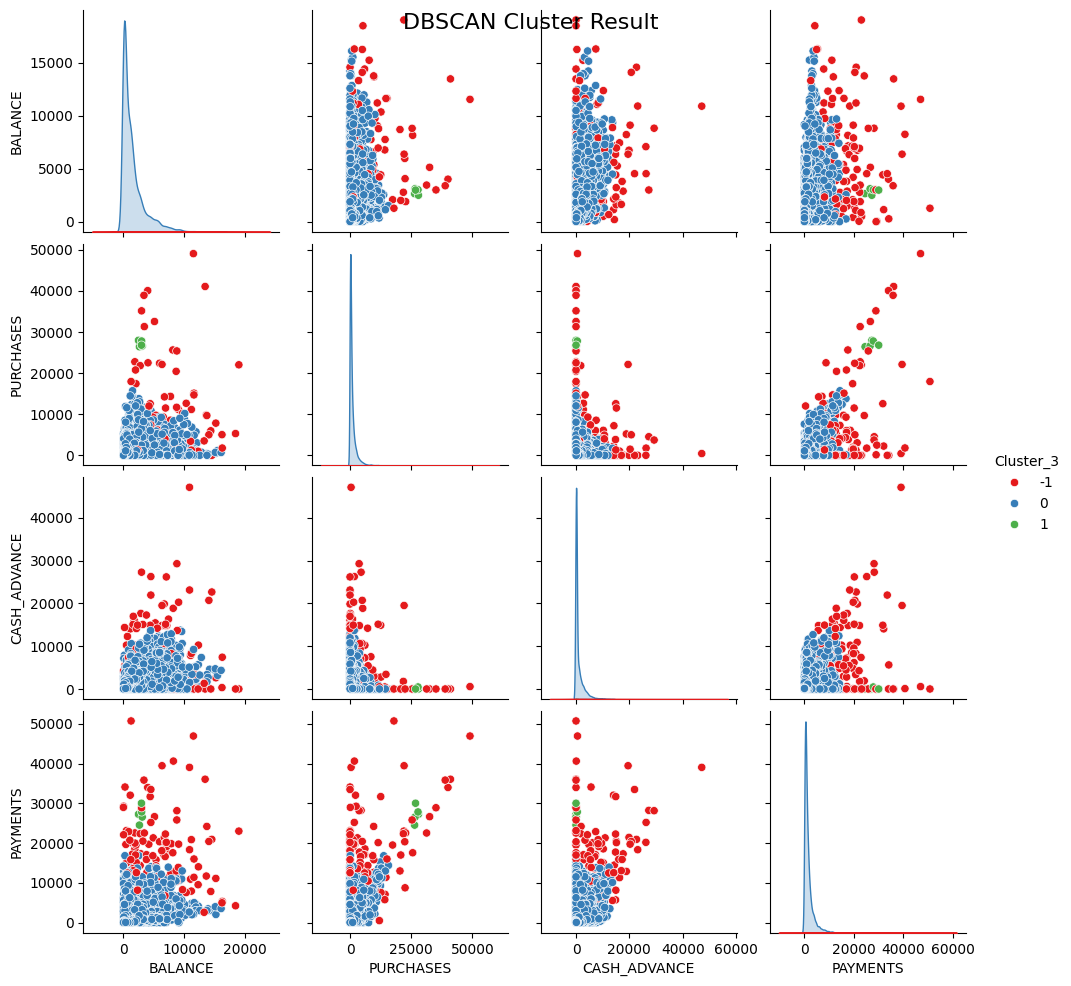

In [ ]:
sns.pairplot(df[selected_feature + ['Cluster_3']],
            vars=selected_feature, hue='Cluster_3',
            palette='Set1', diag_kind='kde')
plt.suptitle('DBSCAN Cluster Result', fontsize=16)
plt.show()
# yg hijau itu cluster 1
# yg merah itu dianggap outlier
# biru-biru banyak yg ke 0
# yg diagonal gada isinya itu distribusi datanya

# Silhouette Score, PCA & t-SNE for Visualisation
## PCA for Kmean Cluster
### 3-day 27
PCA = principal component analysis<br>
T-SNE = t-distributed stochastic neighbor embedding<br>

Silhouette Score punya nilai dari -1 sampai 1<br>
ini punya 2 variable<br>
A = Cohesion artinya seberapa padat data yg di dalam clustering<br> 
B = Separation artinya pemisaha<br>
dalam konteks siloute score yg diperhatikan adalah jarak kepadatan disetiap cluster vs separation<br>
Masih banyak lagi mtk lagi

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

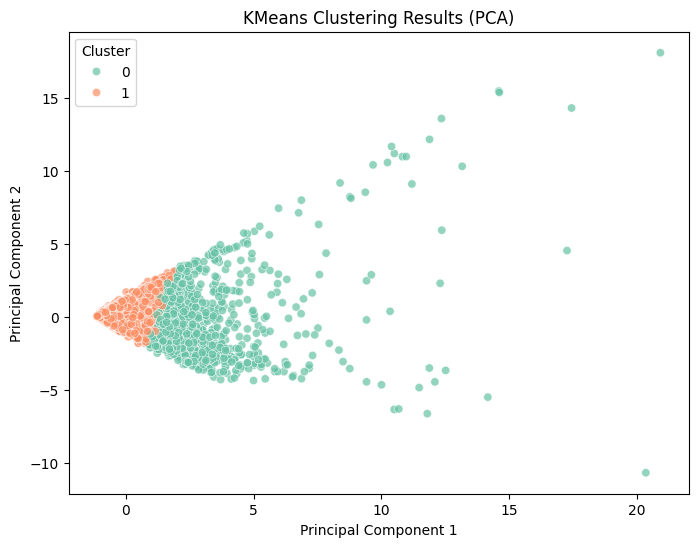

In [ ]:
# PCA itu mempertahankan varian, mempertahankan distribusi antar datanya
# pca1, pca2
pca = PCA(n_components=2, random_state=42)  #n_components > mereduksi data kita sampe berapa dimensi
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', alpha=0.7)
plt.title('KMeans Clustering Results (PCA)')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

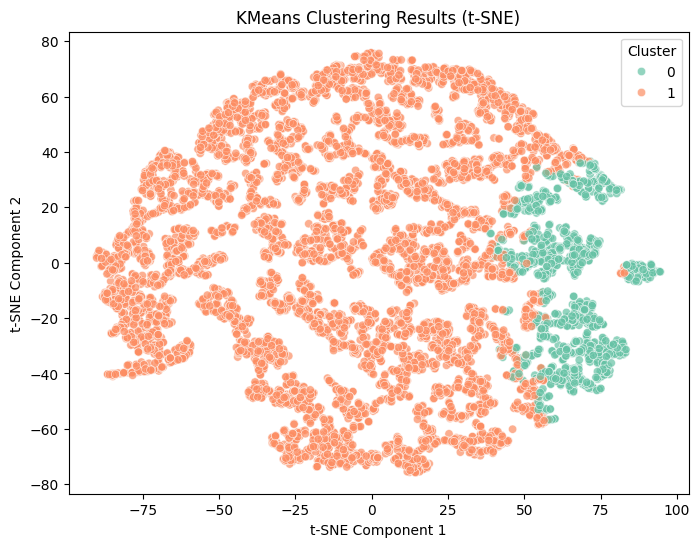

In [ ]:
# T-SNE ini mempertahankan hubungan dimasing-masing tetangga nya
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='Set2', alpha=0.7)
plt.title('KMeans Clustering Results (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

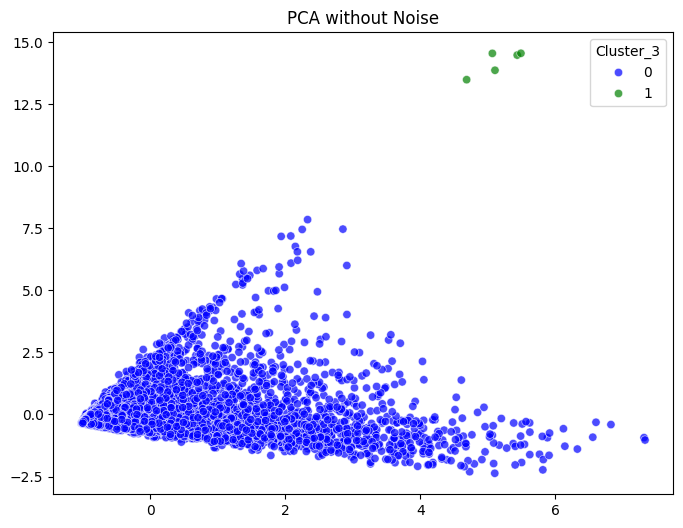

In [30]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)


mask = df["Cluster_3"] != -1  # Buang noise

X_pca_no_noise = PCA(n_components=2, random_state=42).fit_transform(X_scaled[mask])
palette_no_noise = {0: "blue", 1: "green"}

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_no_noise[:,0], y=X_pca_no_noise[:,1],
                hue=df.loc[mask, "Cluster_3"],
                palette=palette_no_noise, alpha=0.7)
plt.title("PCA without Noise")
plt.show()


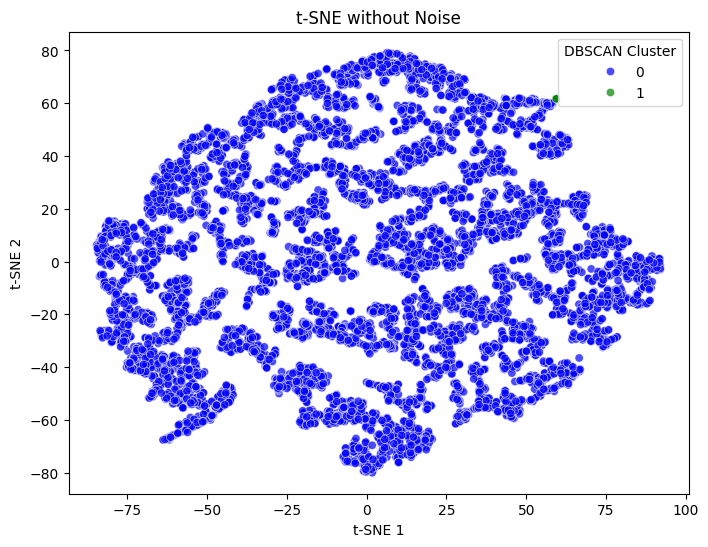

In [ ]:
# run ini visual lama bet juga
mask = df["Cluster_3"] != -1  # Buang noise
X_tsne_no_noise = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_scaled[mask])
palette_no_noise = {0: "blue", 1: "green"}

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_no_noise[:,0], y=X_tsne_no_noise[:,1],
                hue=df.loc[mask, "Cluster_3"],
                palette=palette_no_noise, alpha=0.7)
plt.title("t-SNE without Noise")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="DBSCAN Cluster")
plt.show()